In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_excel('Online Retail.xlsx')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchaseAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       541909 non-null  object        
 1   StockCode       541909 non-null  object        
 2   Description     540455 non-null  object        
 3   Quantity        541909 non-null  int64         
 4   InvoiceDate     541909 non-null  datetime64[ns]
 5   UnitPrice       541909 non-null  float64       
 6   CustomerID      406829 non-null  float64       
 7   Country         541909 non-null  object        
 8   PurchaseAmount  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


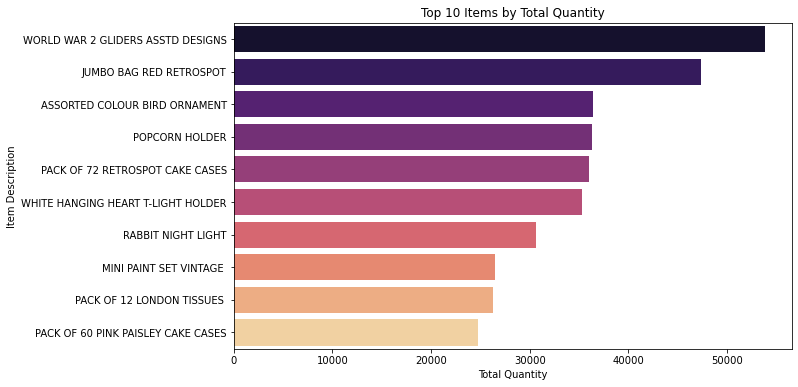

In [5]:
# Grouping by Description and sum up the total Quantity for each Description
total_quantity = data.groupby('Description')['Quantity'].sum().reset_index()

# Sorting the values in descending order based on total Quantity
sorted_totals = total_quantity.sort_values(by = 'Quantity', ascending = False)

# Only the top 10 items
top_10_totals = sorted_totals.head(10)

# Bar plot (using Seaborn)
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Description', data=top_10_totals, palette='magma')
plt.xlabel('Total Quantity')
plt.ylabel('Item Description')
plt.title('Top 10 Items by Total Quantity')
plt.show()

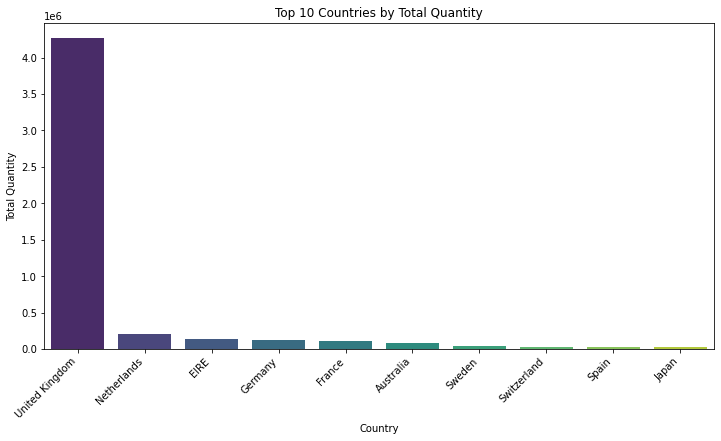

In [6]:
# Group by 'Country' and sum up 'Quantity'
country_quantity = data.groupby('Country')['Quantity'].sum().reset_index()

# Sort the countries by total quantity and select the top 10
top_10_countries = country_quantity.nlargest(10, 'Quantity')

# bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_countries, x='Country', y='Quantity', palette='viridis')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.title('Top 10 Countries by Total Quantity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [7]:
# Sort the dataset by customer ID and invoice date
data.sort_values(by=['CustomerID', 'InvoiceDate'], inplace = True)

# Calculate time difference between consecutive purchases for each customer
data['TimeDiff'] = data.groupby('CustomerID')['InvoiceDate'].diff()

# A time window for repeat purchases (e.g., 30 days)
time_window = pd.Timedelta(days = 30)

# Create a binary target variable indicating repeat purchase within the time window
data['RepeatPurchase'] = (data['TimeDiff'] <= time_window).astype(int)

# Drop the 'TimeDiff' column if no longer needed
data.drop(columns=['TimeDiff'], inplace=True)

In [8]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchaseAmount,RepeatPurchase
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,0
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60,1
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,25.20,0
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,17.00,1
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,39.00,1
...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65,0
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52,0
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96,0
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79,0
